# Problem Set 4

## Problem 1

In [1]:
import numpy as np
import scipy.stats as sts

In [2]:
#Load data
dta = np.loadtxt('Documents/GitHub/persp-model-econ_w20/ProblemSets/PS4/data/incomes.txt')

In [68]:
dta.max()

135865.02679612878

In [69]:
dta.min()

49278.80193843565

### a)

Plot a histogram of percentages of the income.txt data with 30 bins. Make sure that the bins are weighted using the normed=True option. Make sure your plot has correct x-axis and y-axis labels as well as a plot title.

(0, 150000)

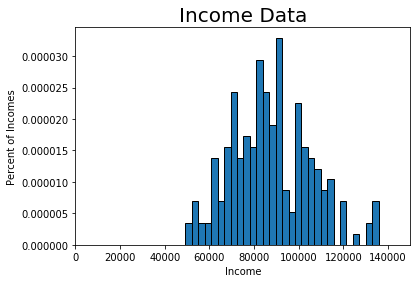

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 150000])

## b) 
Plot the lognormal PDF $f(x|\mu = 11.0,\sigma = 0.5)$ for $0 \leq x \leq 150,000$. What is the value of the log likelihood value for this parameterization of the distribution and given this data?

In [6]:
mu1 = 11
sigma1 = 0.5
x_pts1 = np.linspace(.01,150000,1000)
cut_lb1 = 0
cut_ub1 = 150000


def log_norm(x,mu,sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))
    pdf_vals = ((1/(x*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))))/(prob_notcut)
    return pdf_vals

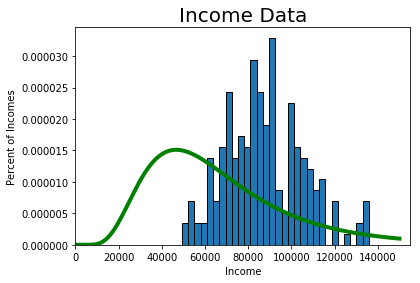

In [9]:
num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 155000])

plt.plot(x_pts,log_norm(x_pts1,mu1,sigma1,cut_lb1,cut_ub1),linewidth=4, color='g')

In [15]:
#Log Likelihood
def log_like(x,mu,sigma,cut_lb,cut_ub):
    pdf_vals = log_norm(x, mu, sigma,cut_lb,cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_like_value = ln_pdf_vals.sum()
    return log_like_value

print('Log-likelihood 1: ', log_like(dta, mu1, sigma1,cut_lb1,cut_ub1))

Log-likelihood 1:  -2385.856997808558


### c) 

Estimate the parameters of the lognormal distribution by maximum likeli- hood and plot its PDF against the PDF from part (b) and the histogram from part (a). Plot the estimated PDF for $0 \leq x \leq 150,000$. Report the ML estimates for $\mu$ and $\sigma$, the value of the likelihood function, and the variance-covariance matrix.

In [17]:
import scipy.optimize as opt

def crit_func(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_lik_value = log_like(x, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_value
    
    return neg_log_lik_val

In [36]:
#Mu and Sigma estimates
params_init = np.array([mu1, sigma1])
mle_args = (dta, cut_lb1, cut_ub1)
results = opt.minimize(crit_func, params_init,method='L-BFGS-B', args=(mle_args),tol=1e-7)
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
results

mu_MLE= 11.295324548989367  sig_MLE= 0.37206490038966045


      fun: nan
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-92.02831279, 353.50190046])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 129
      nit: 1
   status: 2
  success: False
        x: array([11.29532455,  0.3720649 ])

In [37]:
#Likelihood function
log_like(dta,mu_MLE,sig_MLE,cut_lb1, cut_ub1)

-2292.0920777035058

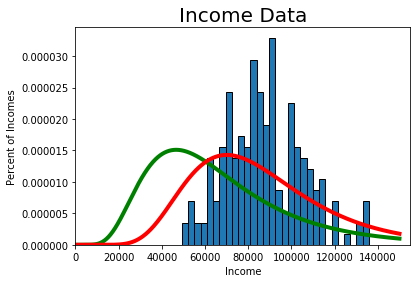

In [38]:
#Graph
#Histogram of data
num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 155000])

#Lognormal
plt.plot(x_pts1,log_norm(x_pts1,mu1,sigma1,cut_lb1,cut_ub1),linewidth=4, color='g')

#Log likelihood estimates
plt.plot(x_pts1,log_norm(x_pts1,mu_MLE,sig_MLE,cut_lb1,cut_ub1),linewidth=4, color='r')

In [39]:
#Covariance Matrix
vcv_mle = results.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

TypeError: 'LbfgsInvHessProduct' object is not subscriptable

### d)
Perform a likelihood ratio test to determine the probability that the data in incomes.txt came from the distribution in part (b).

In [22]:
log_lik_h0 = log_like(dta, mu1, sigma1, cut_lb1, cut_ub1)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_like(dta, mu_MLE, sig_MLE, cut_lb1, cut_ub1)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.719301357364
likelihood ratio value 288.27539290238747
chi squared of H0 with 2 degrees of freedom p-value =  0.0


### e) 

With your estimated distribution of incomes for Chicago MACSS students from part (c), you now have a model for what your own income might look like when you graduate. Using that estimated model from part (c), What is the probability that you will earn more than $100,000$? What is the probability that you will earn less than $75,000$?

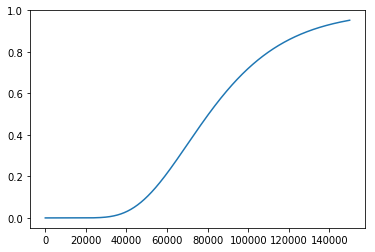

In [58]:
from scipy.stats import lognorm
#shape = sigma
#scale = np.exp(mu)
#loc = 0

distr = lognorm.cdf(x_pts1,sig_MLE, 0, np.exp(mu_MLE))

#Plot cdf
plt.plot(x_pts1,distr)

In [66]:
#less than 75k
less75k = np.interp(75000,x_pts1,distr)

#More than 100K
more100k = 1- (np.interp(100000,x_pts1,distr))

print('Probability of earning less than 75k = ', less75k)
print('Probability of earning more than 100k = ', more100k)

Probability of earning less than 75k =  0.42529800723635913
Probability of earning more than 100k =  0.2793254120359797


## Problem 2

### a) 
Estimate the parameters of the model ($\beta_0,\beta_1,\beta_2,\beta_3,\sigma^{2}$) by maximum likelihood using the fact that each error term $\epsilon_i$ is distributed normally $N(0, \sigma^{2})$. We can solve the regression equation for $\epsilon_i$ which tells us that the following equation is distributed normally $N(0, \sigma^{2})$.
$sick_i−\beta_0−\beta_1age_i−\beta_2children_i−\beta_3tempwinter_i$  ∼$N(0,\sigma^{2})$
Estimate ($\beta_0,\beta_1,\beta_2,\beta_3,\sigma^{2}$) to maximize the likelihood of seeing the data in sick.txt. Report your estimates, the value of the log likelihood function, and the estimated variance covariance matrix of the estimates.

In [113]:
from numpy import genfromtxt

dta2=genfromtxt('Documents/GitHub/persp-model-econ_w20/ProblemSets/PS4/data/sick.csv', delimiter=',',skip_header=1)

In [116]:
#Loglike Function

def loglike_lr(true_value, est):
    resid = true_value-est
    sigma = np.std(true_value-est)
    vals = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (resid)**2 / (2 * sigma**2))))
    return np.log(vals)
    

In [125]:
def crit_lr(beta):
    sick = dta2[:,0]
    age = dta2[:,1]
    children = dta2[:,2]
    temp = dta2[:,3]
    y_est = beta[0] - beta[1]*age -beta[2]*temp - beta[3]*children
    log_lik_value = loglike_lr(sick,y_est)
    neg_log_lik_val = -log_lik_value
    return neg_log_lik_val
    

In [127]:
beta = np.zeros(4)
beta[0]=.5
beta[1]=.5
beta[2]=.5
beta[3]=.5

results_lr = opt.minimize(crit_lr,beta,method='L-BFGS-B',tol=1e-7)

ValueError: setting an array element with a sequence.

array([0.5, 0.5, 0.5, 0.5])